# O que é IDHM

<span style="font-size:14px;">Links importantes
https://www.undp.org/pt/brazil/o-que-%C3%A9-o-idhm
  
Base de dados Ipea  
https://www.ipea.gov.br/ipeageo/arquivos/bases/IDH_2010.xls
  
O índice de Desenvolvimento Humano Mundial (IDHM) é uma medida composta de indicadores de três dimensões do desenvolvimento   
humano: longevidade, educação e renda. O índice varia de 0 a 1. Quanto mais próximo de 1, maior o desenvolvimento humano.  
  
O IDHM brasileiro segue as mesmas três dimensões do IDH Global - longevidade, educação e renda, mas vai além: adequa a metodologia    
global ao contexto brasileiro e à disponibilidade de indicadores nacionais. Embora meçam os mesmos fenômenos, os indicadores levados em  
conta no IDHM são mais adequados para avaliar o desenvolvimento dos municípios brasileiros. Assim, o IDHM - incluindo seus três  
componentes, IDHM Longevidade, IDHM Educação e IDHM Renda - conta um pouco da história dos municípios em três importantes dimensões  
do desenvolvimento humano durante duas décadas da história brasileira.  




In [2]:
# Libs

import pandas as pd
import numpy as np

# Libs Gráficas

import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

# Avisos

import warnings
warnings.filterwarnings('ignore')


In [3]:
idhm = pd.read_excel(r"C:\Users\fabia\OneDrive\FIAP_INICIO\Live_04042024\IDH_2010.xls")
idhm.head()


,ANO,Código da Unidade da Federação,Nome da Unidade da Federação,Código do Município,Município,Esperança de vida ao nascer,Taxa de fecundidade total,Mortalidade infantil,Mortalidade até 5 anos de idade,Razão de dependência,...,População de 15 a 17 anos.1,População de 18 anos ou mais.1,População total em domicílios particulares permanentes,"População total em domicílios particulares permanentes, exceto com renda nula",Subíndice de escolaridade - IDHM Educação,Subíndice de frequência escolar - IDHM Educação,IDHM,IDHM Educação,IDHM Longevidade,IDHM Renda
0,2010,11,Rondônia,110001,ALTA FLORESTA D'OESTE,70.75,2.24,23.8,25.49,47.37,...,1602,16431,24097,22429,0.368,0.629,0.641,0.526,0.763,0.657
1,2010,11,Rondônia,110002,ARIQUEMES,73.36,1.91,19.2,20.53,46.68,...,5256,60213,89766,88730,0.514,0.648,0.702,0.600,0.806,0.716
2,2010,11,Rondônia,110003,CABIXI,70.39,2.15,24.8,26.58,48.12,...,381,4306,6303,6156,0.357,0.700,0.650,0.559,0.757,0.650
3,2010,11,Rondônia,110004,CACOAL,74.27,1.90,14.3,15.38,43.79,...,4547,54356,78141,76876,0.488,0.698,0.718,0.620,0.821,0.727
4,2010,11,Rondônia,110005,CEREJEIRAS,72.94,2.12,18.1,19.42,45.67,...,1033,11786,16942,16815,0.430,0.712,0.692,0.602,0.799,0.688


In [4]:
# 5.564 linhas e 237 características (colunas)
print(f'Tamanho do nosso Dataset: {idhm.shape}')


Tamanho do nosso Dataset: (5564, 237)


Verificar os tipos de Dados

In [5]:
idhm.dtypes


ANO                                                  int64
Código da Unidade da Federação                       int64
Nome da Unidade da Federação                        object
Código do Município                                  int64
Município                                           object
                                                    ...   
Subíndice de frequência escolar - IDHM Educação    float64
IDHM                                               float64
IDHM Educação                                      float64
IDHM Longevidade                                   float64
IDHM Renda                                         float64
Length: 237, dtype: object

In [6]:
# ir colocando sum() até trazer o número / se eu não colocar a soma ele vai trazer boleano / se eu somar tudo e der algum número é porque eu tenho nulo
print(f'Quantidade de dados nulos: {idhm.isnull().sum().sum()}')


Quantidade de dados nulos: 0


In [7]:
# Trazendo somente as colunas que eu quero do DataSet para construir meu DataFrame
df_idhm = idhm[['Nome da Unidade da Federação', 'Município','IDHM','IDHM Educação','IDHM Longevidade','IDHM Renda']]


In [8]:
df_idhm.head()


,Nome da Unidade da Federação,Município,IDHM,IDHM Educação,IDHM Longevidade,IDHM Renda
0,Rondônia,ALTA FLORESTA D'OESTE,0.641,0.526,0.763,0.657
1,Rondônia,ARIQUEMES,0.702,0.600,0.806,0.716
2,Rondônia,CABIXI,0.650,0.559,0.757,0.650
3,Rondônia,CACOAL,0.718,0.620,0.821,0.727
4,Rondônia,CEREJEIRAS,0.692,0.602,0.799,0.688


In [9]:
# Renomeando as colunas / ideal para não ter espços, acentos, etc
df_idhm.columns = ['UF', 'municipio', 'idhm','idhm_educação','idhm_longevidade','idhm_renda']


In [10]:
df_idhm.head()


,UF,municipio,idhm,idhm_educação,idhm_longevidade,idhm_renda
0,Rondônia,ALTA FLORESTA D'OESTE,0.641,0.526,0.763,0.657
1,Rondônia,ARIQUEMES,0.702,0.600,0.806,0.716
2,Rondônia,CABIXI,0.650,0.559,0.757,0.650
3,Rondônia,CACOAL,0.718,0.620,0.821,0.727
4,Rondônia,CEREJEIRAS,0.692,0.602,0.799,0.688


In [11]:
df_idhm.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5564 entries, 0 to 5563
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   UF                5564 non-null   object 
 1   municipio         5564 non-null   object 
 2   idhm              5564 non-null   float64
 3   idhm_educação     5564 non-null   float64
 4   idhm_longevidade  5564 non-null   float64
 5   idhm_renda        5564 non-null   float64
dtypes: float64(4), object(2)
memory usage: 260.9+ KB


In [12]:
# 
df_idhm.nunique()


UF                    27
municipio           5329
idhm                 349
idhm_educação        466
idhm_longevidade     220
idhm_renda           390
dtype: int64

In [13]:
# describe traz uma estatística básica: contagem, média, desvio padrão, mínimo, máximo / Só traz dados númericos, ou seja, só considera números para fazer a estatística
df_idhm.describe()


,idhm,idhm_educação,idhm_longevidade,idhm_renda
count,5564.000000,5564.000000,5564.000000,5564.000000
mean,0.659168,0.559102,0.801568,0.642891
std,0.072000,0.093334,0.044684,0.080658
min,0.418000,0.207000,0.672000,0.400000
25%,0.599000,0.490000,0.769000,0.572000
50%,0.665000,0.560000,0.808000,0.654000
75%,0.718000,0.631000,0.836000,0.707000
max,0.862000,0.825000,0.894000,0.891000


# Primeira Análise
  
0 - 0,499 - Baixo Desenvolvimento Humano  
0,5 - 0,799 - Médio Desenvolvimento Humano  
0,8 - 1 - Alto Desenvolvimento Humano  

In [14]:
# Condições /  função
# idhm_class = nome da função
# df = data frame como argumento

def idhm_class(df):
    if df['idhm']>=0.8: # se dentro do data frame/coluna idhm o valor for maior ou igual a 0.8
        return 'Alto Desenvolvimento Humano' # trazer como retorno 'Baixo Desenvolvimento Humano'
    elif df['idhm']<0.499: # se dentro do data frame/coluna idhm o valor for menor que 0.499
        return 'Baixo Desenvolvimento Humano' # trazer como retorno 'Médio Desenvolvimento Humano'
    else: # se não... caso contrário
        return 'Médio Desenvolvimento Humano' # trazer 'Alto Desenvolvimento Humano'


O parâmetro axis=1 na função apply indica que a função idhm_class será aplicada ao longo das linhas do DataFrame df_idhm.  
Em outras palavras, ele diz ao pandas para aplicar a função idhm_class a cada linha do DataFrame em vez de aplicá-la a cada coluna,  
que seria o caso se axis fosse igual a 0.  
  
Quando axis=1, cada chamada da função idhm_class passará uma série que representa uma linha do DataFrame df_idhm como argumento, permitindo que você  
faça cálculos ou tomadas de decisão com base nos valores dessa linha.

In [15]:
# abro uma nova coluna chamada 'classes' e aplico a função idhm_class, que acabei de criar acima
df_idhm['classes'] = df_idhm.apply(idhm_class, axis=1)


In [16]:
df_idhm


,UF,municipio,idhm,idhm_educação,idhm_longevidade,idhm_renda,classes
0,Rondônia,ALTA FLORESTA D'OESTE,0.641,0.526,0.763,0.657,Médio Desenvolvimento Humano
1,Rondônia,ARIQUEMES,0.702,0.600,0.806,0.716,Médio Desenvolvimento Humano
2,Rondônia,CABIXI,0.650,0.559,0.757,0.650,Médio Desenvolvimento Humano
3,Rondônia,CACOAL,0.718,0.620,0.821,0.727,Médio Desenvolvimento Humano
4,Rondônia,CEREJEIRAS,0.692,0.602,0.799,0.688,Médio Desenvolvimento Humano
...,...,...,...,...,...,...,...
5559,Goiás,VIANÓPOLIS,0.712,0.622,0.818,0.710,Médio Desenvolvimento Humano
5560,Goiás,VICENTINÓPOLIS,0.684,0.562,0.804,0.707,Médio Desenvolvimento Humano
5561,Goiás,VILA BOA,0.647,0.534,0.818,0.619,Médio Desenvolvimento Humano
5562,Goiás,VILA PROPÍCIO,0.634,0.505,0.802,0.629,Médio Desenvolvimento Humano


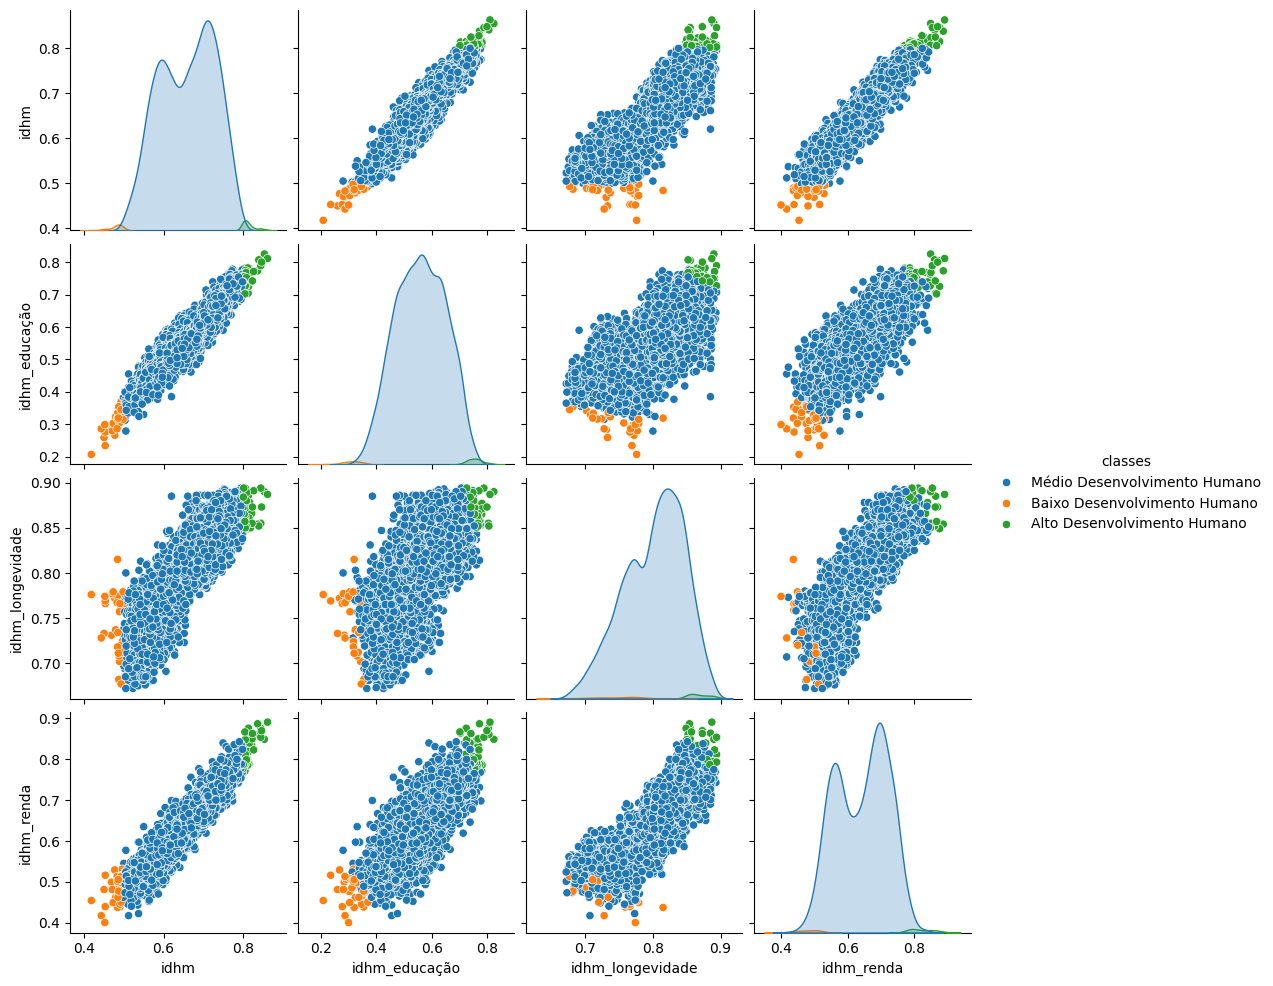

In [17]:
# vai plotar vários gráficos cruzando uma informação com as outras
# hue = legenda / trazendo a característica de 'classes'
sns.pairplot(df_idhm, hue = 'classes')


# Análise por Estado


In [18]:
# Filtro
# Agrupa os UF trazendo a média dessse grupo e o valor arredondando para 2 casas decimais
# reset_index = para trazer uma sequencia dos números e não trazer os números do índice original.
# se eu tirar o reset_index, o UF se torna o meu índice
df_idhm_estado = pd.DataFrame(df_idhm.groupby('UF')['idhm'].mean().round(2)).reset_index()


In [19]:
df_idhm_estado


,UF,idhm
0,Acre,0.59
1,Alagoas,0.56
2,Amapá,0.64
3,Amazonas,0.57
4,Bahia,0.59
5,Ceará,0.62
6,Distrito Federal,0.82
7,Espírito Santo,0.69
8,Goiás,0.69
9,Maranhão,0.58


Utilizando a Função Class


In [20]:
# Através do código abaixo conseguimo reutilizar a função Class, que criamos anteriormente para sabermos a classificação para a estrutura acima, ou seja, 
# a classificação (agora) para cada estado. Pois anteriormente tínhamos definido a classificação da Classe para cada linha do DataFrame
# Consigo aplicar essa função toda vez que precisar

df_idhm_estado['classe'] = df_idhm_estado.apply(idhm_class, axis=1)

# ['classe'] --> Criando uma coluna dentro de df_idhm_estado chamada 'classe' e nesta coluna vou aplicar a função 'class' / axis = 1 = para cada linha deste df


In [21]:
df_idhm_estado


,UF,idhm,classe
0,Acre,0.59,Médio Desenvolvimento Humano
1,Alagoas,0.56,Médio Desenvolvimento Humano
2,Amapá,0.64,Médio Desenvolvimento Humano
3,Amazonas,0.57,Médio Desenvolvimento Humano
4,Bahia,0.59,Médio Desenvolvimento Humano
5,Ceará,0.62,Médio Desenvolvimento Humano
6,Distrito Federal,0.82,Alto Desenvolvimento Humano
7,Espírito Santo,0.69,Médio Desenvolvimento Humano
8,Goiás,0.69,Médio Desenvolvimento Humano
9,Maranhão,0.58,Médio Desenvolvimento Humano


In [22]:
# trazendo informações do df acima
df_idhm_estado.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   UF      27 non-null     object 
 1   idhm    27 non-null     float64
 2   classe  27 non-null     object 
dtypes: float64(1), object(2)
memory usage: 780.0+ bytes


In [23]:
# describe clássico / estatística básica
df_idhm_estado.describe()


,idhm
count,27.000000
mean,0.644815
std,0.064651
min,0.560000
25%,0.590000
50%,0.640000
75%,0.690000
max,0.820000


# Usando o MATPLOTLIB

Text(0, 0.5, 'Valores')

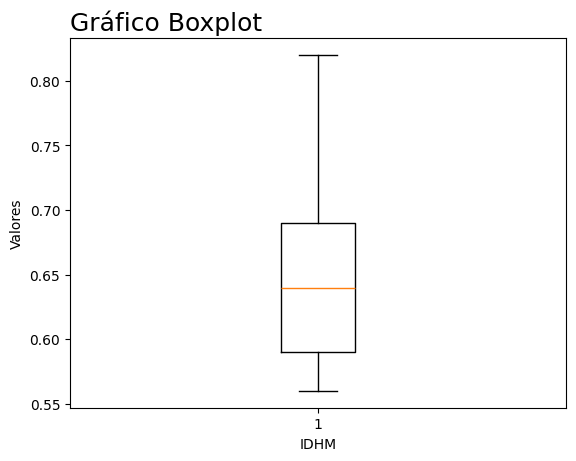

In [24]:
# Usando o MATPLOTLIB

plt.title('Gráfico Boxplot', loc = 'left', fontsize = 18)
plt.boxplot(df_idhm_estado['idhm']);

plt.xlabel('IDHM')
plt.ylabel('Valores')


Text(0, 0.5, 'Valores')

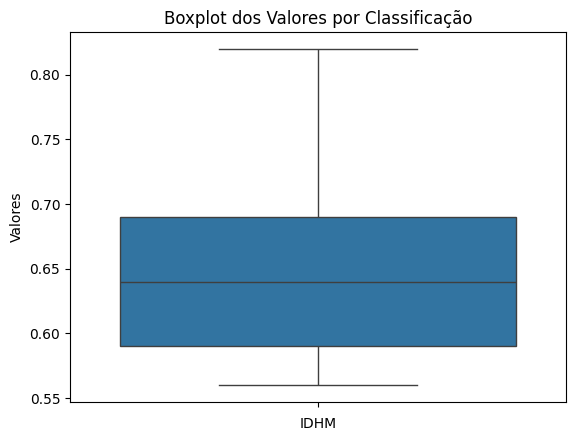

In [25]:
# Usando SEABORN
sns.boxplot(y=df_idhm_estado['idhm'], data=df_idhm_estado)

# Adcionando rótulos dos eixos
plt.title('Boxplot dos Valores por Classificação')
plt.xlabel('IDHM')
plt.ylabel('Valores')


# Criando um gráfico de Barras


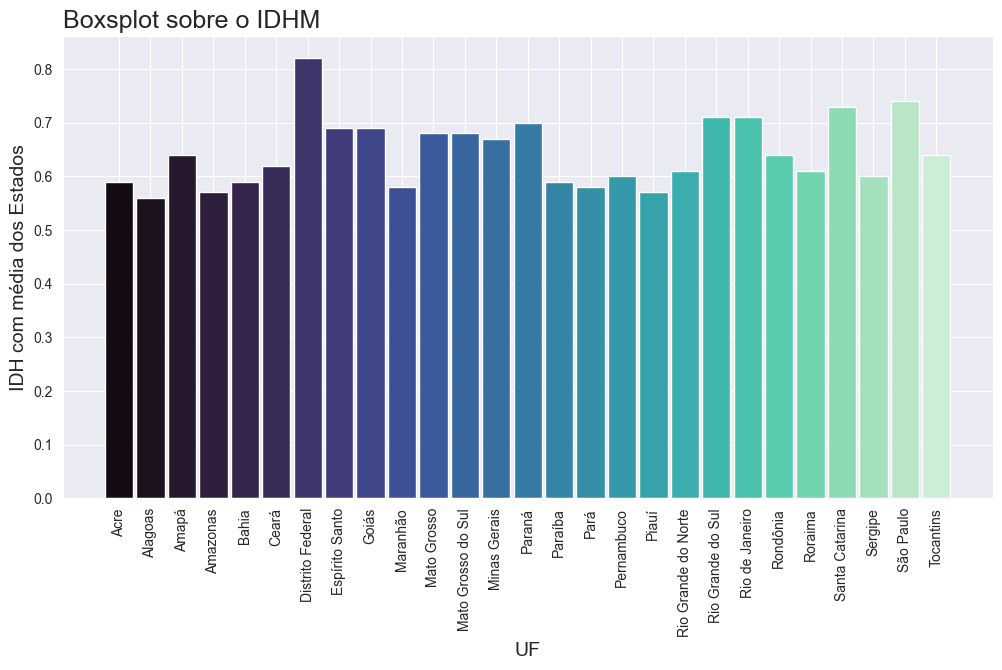

In [26]:
# Tamanho da Figura
plt.figure(figsize=(12,6))

# Paleta de Cores
Paleta_Cores = sns.color_palette('mako', len(df_idhm_estado))
sns.set_style('darkgrid')

# Plotagem
plt.bar(df_idhm_estado['UF'],
        df_idhm_estado['idhm'],
        width=0.9,
        color = Paleta_Cores
        )

# Título
plt.title('Boxsplot sobre o IDHM', loc= 'left', fontsize = 18)

# Label
plt.xlabel('UF', fontsize = 14)
plt.ylabel('IDH com média dos Estados', fontsize = 14)
plt.xticks(rotation = 90);


# Usando o Ploty

In [29]:
# Criar um gráfico de barras usando o Ploty
fig = px.bar(df_idhm_estado, x='UF', y='idhm', text = 'idhm', color = 'classe', color_discrete_sequence=['orange', 'green'])

# Adicionar título e rótulos dos eixos
fig.update_layout(title='Gráfico de Barras',
                  xaxis_title='UF',
                  yaxis_title='idhm')
fig.show()


In [30]:
# Usando o Plotly - TreeMap
fig = px.treemap(df_idhm_estado, path=['UF'], values='idhm', title='UF - TreeMap')

# Para exibir o treemap
fig.update_traces(root_color='lightgrey')

fig.show()
